In [78]:
# Updated code using the correct method for text measurement in Pillow
from PIL import Image, ImageDraw, ImageFont

# Create the base image with #89CC04 color
image_size = (500, 500)
background_color = "#89CC04"
image = Image.new("RGB", image_size, background_color)

# Prepare to draw text
draw = ImageDraw.Draw(image)
text = "brat"
font_size = 120

try:
    # Use a common Arial font (system dependent)
    font = ImageFont.truetype("arial.ttf", font_size)
except IOError:
    # Default to a PIL internal font if Arial is unavailable
    font = ImageFont.load_default()

# Determine text bounding box and position
text_bbox = draw.textbbox((0, 0), text, font=font)
text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
text_position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)

# Draw the text on the image
draw.text(text_position, text, fill="black", font=font)

# Stretch the image to create the "stretched" effect
stretched_image = image.resize((500, 700))  # Stretch horizontally

# Crop the stretched image to make it a square with the short edge as the size
short_edge = min(stretched_image.size)  # Find the shortest side
left = (stretched_image.width - short_edge) // 2
top = (stretched_image.height - short_edge) // 2
right = left + short_edge
bottom = top + short_edge

# Perform the crop
square_image = stretched_image.crop((left, top, right, bottom))

# Display the resulting square image
# square_image.show()

# Apply mosaic effect to reduce text clarity
def apply_mosaic(image, pixel_size):
    # Reduce resolution
    small = image.resize((image.size[0] // pixel_size, image.size[1] // pixel_size), Image.BILINEAR)
    # Scale back to original size
    mosaic_image = small.resize(image.size, Image.NEAREST)
    return mosaic_image

# Apply the mosaic effect
pixel_size = 3  # Adjust pixel_size to control the level of the mosaic effect
mosaic_image = apply_mosaic(square_image, pixel_size)
mosaic_image.show()


In [80]:
from PIL import Image, ImageDraw, ImageFont, ImageSequence
import numpy as np

# Function to generate frames for the GIF
def generate_mosaic_frames(image, start_pixel_size, end_pixel_size, num_frames):
    frames = []
    pixel_sizes = np.linspace(start_pixel_size, end_pixel_size, num_frames)
    for pixel_size in pixel_sizes:
        pixel_size = max(1, int(pixel_size))  # Ensure pixel_size is at least 1
        frame = apply_mosaic(image, pixel_size)
        frames.append(frame)
    return frames

# Parameters for the GIF
start_pixel_size = 1
end_pixel_size = 30
fps = 120
num_frames = fps  # 1 second of animation

# Generate frames
frames = generate_mosaic_frames(square_image, start_pixel_size, end_pixel_size, num_frames)

# Save the frames as a GIF
gif_path = "mosaic_animation.gif"
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=1000 // fps,  # Frame duration in milliseconds
    loop=0  # Infinite loop
)

# Display the path to the saved GIF
gif_path


'mosaic_animation.gif'

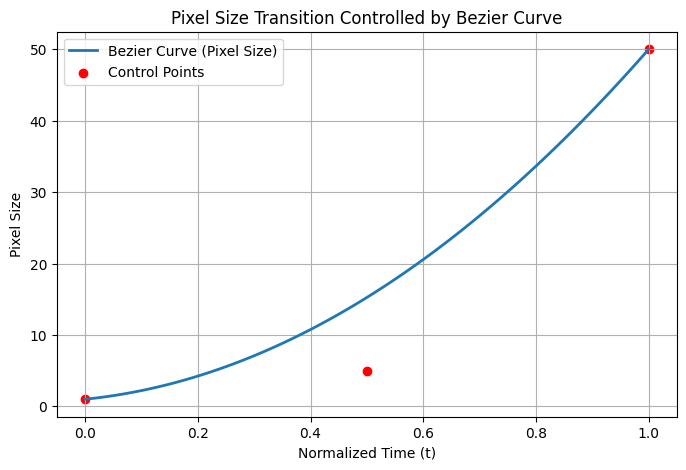

'mosaic_animation_bezier.gif'

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from PIL import Image, ImageDraw, ImageFont, ImageSequence

# Function to create Bezier curve points
def bezier_curve(p0, p1, p2, num_points):
    t = np.linspace(0, 1, num_points)
    curve = (1 - t)**2 * p0 + 2 * (1 - t) * t * p1 + t**2 * p2
    return curve

# Generate control points for the Bezier curve
p0, p1, p2 = 1, 5, 50  # Starting, control, and ending pixel sizes
num_frames = 120  # Number of frames for the animation
pixel_sizes = bezier_curve(p0, p1, p2, num_frames)

# Plot the Bezier curve
plt.figure(figsize=(8, 5))
t_values = np.linspace(0, 1, num_frames)
plt.plot(t_values, pixel_sizes, label="Bezier Curve (Pixel Size)", linewidth=2)
plt.scatter([0, 0.5, 1], [p0, p1, p2], color="red", label="Control Points")
plt.title("Pixel Size Transition Controlled by Bezier Curve")
plt.xlabel("Normalized Time (t)")
plt.ylabel("Pixel Size")
plt.legend()
plt.grid(True)
plt.show()

# Apply mosaic effect
def apply_mosaic(image, pixel_size):
    small = image.resize((image.size[0] // pixel_size, image.size[1] // pixel_size), Image.Resampling.BILINEAR)
    mosaic_image = small.resize(image.size, Image.Resampling.NEAREST)
    return mosaic_image

# Generate frames for the GIF based on Bezier curve
def generate_mosaic_frames(image, pixel_sizes):
    frames = []
    for pixel_size in pixel_sizes:
        pixel_size = max(1, int(pixel_size))  # Ensure pixel_size is at least 1
        frame = apply_mosaic(image, pixel_size)
        frames.append(frame)
    return frames

# Generate frames
frames = generate_mosaic_frames(square_image, pixel_sizes)

# Save the frames as a GIF
gif_path = "mosaic_animation_bezier.gif"
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=1000 // num_frames,  # Frame duration in milliseconds
    loop=0  # Infinite loop
)

gif_path


In [94]:
from math import pi, sin
from PIL import Image, ImageSequence
import numpy as np

# Function to generate frames for the GIF with non-linear speed
def generate_mosaic_frames_non_linear(image, start_pixel_size, end_pixel_size, num_frames):
    frames = []
    # Generate non-linear interpolation using a sine function
    pixel_sizes = start_pixel_size + (end_pixel_size - start_pixel_size) * (
        0.5 * (1 - np.cos(np.linspace(0, pi, num_frames)))  # Ease-in and ease-out
    )
    for pixel_size in pixel_sizes:
        pixel_size = max(1, int(pixel_size))  # Ensure pixel_size is at least 1
        frame = apply_mosaic(image, pixel_size)
        frames.append(frame)
    return frames

# Parameters for the GIF
start_pixel_size = 1
end_pixel_size = 22
fps = 120
second = 2
num_frames = fps * second  # 1 second of animation

# Generate frames with non-linear speed
frames = generate_mosaic_frames_non_linear(square_image, start_pixel_size, end_pixel_size, num_frames)

# Save the frames as a GIF
gif_path_non_linear = "mosaic_animation_non_linear.gif"
frames[0].save(
    gif_path_non_linear,
    save_all=True,
    append_images=frames[1:],
    duration=1000 // fps,  # Frame duration in milliseconds
    loop=0  # Infinite loop
)

# Display the path to the saved GIF
gif_path_non_linear


'mosaic_animation_non_linear.gif'

In [98]:
# Function to add reverse and loop for the GIF
def add_reverse_and_loop(frames):
    reversed_frames = list(reversed(frames))  # Create reversed frames
    full_frames = frames + reversed_frames  # Combine original and reversed frames
    return full_frames

# Create the non-linear frames
frames_non_linear = generate_mosaic_frames_non_linear(square_image, start_pixel_size, end_pixel_size, num_frames)

# Add reverse and loop
loop_frames = add_reverse_and_loop(frames_non_linear)

# Save the looped animation as a GIF
gif_path_loop = "mosaic_animation_non_linear_loop.gif"
loop_frames[0].save(
    gif_path_loop,
    save_all=True,
    append_images=loop_frames[1:],
    duration=1000 // fps,  # Frame duration in milliseconds
    loop=0  # Infinite loop
)

# Display the path to the saved GIF
gif_path_loop


GIF saved at mosaic_animation_charlie_xcx.gif
